# Data Visualization

First, we need to import pandas.

In [10]:
import pandas as pd

Then, we should import Seaburn - a Python visualization library based on matplotlib. In order for seaburn visualizations to work properly we also need to import matplotlib (Python 2D plotting library), NumPy (library for scientific computing with Python), and SciPy (a library for mathematical opreations).

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import numpy as np
from scipy import stats, integrate
%matplotlib inline


For the beginning of this tutorial, we are going to work with "campaigns.xslx" dataset.

In [12]:
campaigns = pd.read_excel('campaigns2.xlsx')

In [14]:
campaigns['Website'] = campaigns['Website'].replace('usa today', 'usa_today')

<hr>


When one of our main variables contains categorical data we should aim at finding the clearest way to visualize it without overloading the graphical interpretation with irrelevant data and figures. Visualizations of categorical data can be highly structured, or providing a more abstract representation of the observations distributions, and can even visualize statistical estimation to show a measure of central tendency and confidence interval.  

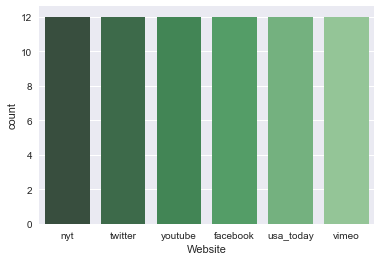

In [4]:
sns.countplot(x="Website", data=campaigns, palette="Greens_d");

This simple bar chart presents the number of observations in each of the website's categories. As we can see in the chart, there are 12 observations in all of the categories. In the command, we can define the dataset that we apply the visualization for (in "data") and the colours of the bars (in "palette"). We can also define the Xs or the Ys. In this particular example, we used the Xs while the Ys presented the count, but it can easily be switched.  

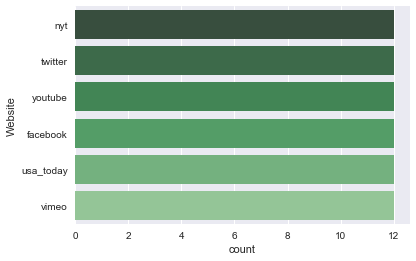

In [5]:
sns.countplot(y="Website", data=campaigns, palette="Greens_d");

With scatterplots, we can visualize categorical data and numeric values. In this example, we used the website's categories and presented it over the distribution of clicks per a website category. Using the "jitter" command we can adjust the position of the plots so that they will not overlap.

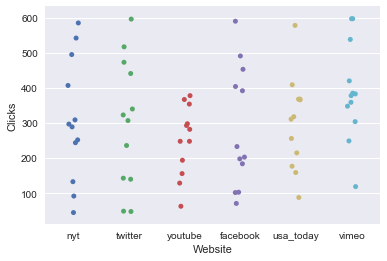

In [6]:
sns.stripplot(x="Website", y="Clicks", data=campaigns, jitter=True)

Now, we will categorize the websites to have a more meaningful visualization.

In [16]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

In [21]:
campaigns['News'] = campaigns['Website'].apply(wordlist_any_present, args=(['nyt','usa_today'],))
campaigns['Social Media'] = campaigns['Website'].apply(wordlist_any_present, args=(['facebook','twitter'],))
campaigns['Video'] = campaigns['Website'].apply(wordlist_any_present, args=(['youtube','vimeo'],))

In [22]:
def categorise_df(row):
    row['type of website'] = 'type of website'
    if (row['News'] == 1):
        row['type of website'] = 'News'
    if (row['Social Media'] == 1):
        row['type of website'] = 'Social Media'
    if (row['Video'] == 1):
        row['type of website'] = 'Video'
    return row

In [23]:
campaigns_new = campaigns.apply(categorise_df, axis=1)

Once the websites are categorized in groups we can add another variable to our visualization. We could also do that without categorizing the websites, nevertheless, data visualizations should be readable. Hence, we should consider the aesthetics and structure of our data. In this example we included the campaign number, comparing the frequency of each website category (news, social media, and video) in each of the campaigns.

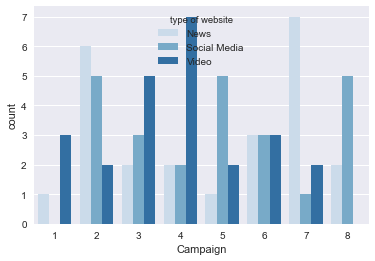

In [24]:
sns.countplot(x="Campaign", hue ="type of website", data=campaigns_new, palette="Blues");

We can also add another variable in the Ys instead of the count and visualize how many clicks each category has in each of the campaigns.

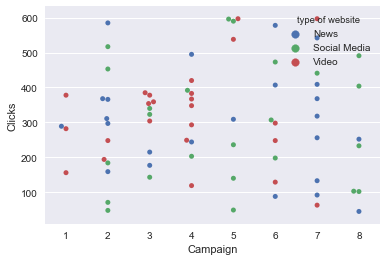

In [164]:
sns.swarmplot(x="Campaign", y="Clicks", hue="type of website", data=campaigns_new);

We can use categorical visualisations to present statistical estimations. The next box plot demonstrates three quartile values of the distribution of the number of clicks each category has in each of the campaigns. 

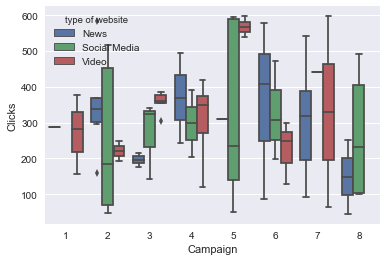

In [19]:
sns.boxplot(x="Campaign", y="Clicks", hue="type of website", data=campaigns_new);

In the following bar chart, the black lines (called error bars) represent the confidence intervals. Differently, from the box plot, this bar char presents the mean number of clicks instead of a normal count. 

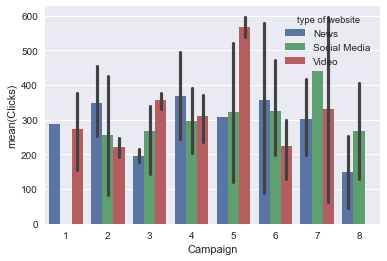

In [20]:
sns.barplot(x="Campaign", y="Clicks", hue="type of website", data=campaigns_new);

<hr>

In some cases, data is better to be presented in a table. In this case, we can use cross tables. The following table presents the number of items in each website category within each of the campaigns.

In [22]:
pd.crosstab(campaigns_new["type of website"],campaigns_new["Campaign"],margins=True)

Campaign,1,2,3,4,5,6,7,8,All
type of website,,,,,,,,,
News,1,6,2,2,1,3,7,2,24
Social Media,0,5,3,2,5,3,1,5,24
Video,3,2,5,7,2,3,2,0,24
All,4,13,10,11,8,9,10,7,72


We can also use the following function if we prefer to use percentages other than the number of items.

In [23]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(campaigns_new["type of website"],campaigns_new["Campaign"],margins=True).apply(percConvert, axis=1)

Campaign,1,2,3,4,5,6,7,8,All
type of website,,,,,,,,,
News,0.041667,0.250000,0.083333,0.083333,0.041667,0.125,0.291667,0.083333,1.0
Social Media,0.000000,0.208333,0.125000,0.083333,0.208333,0.125,0.041667,0.208333,1.0
Video,0.125000,0.083333,0.208333,0.291667,0.083333,0.125,0.083333,0.000000,1.0
All,0.055556,0.180556,0.138889,0.152778,0.111111,0.125,0.138889,0.097222,1.0


<hr>

Seaburn allows us to visualize statistical properties. In the last weekly assignment, you already visualized your data using histograms. When dealing with univariate data Seaburn visualizations can present statistical estimates and distributions. In the following histogram, I outlined the distribution of the clicks in the dataset.

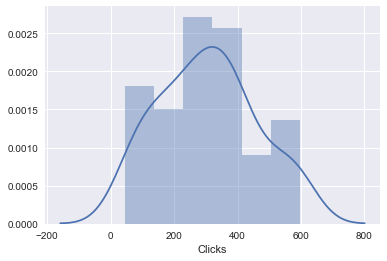

In [122]:
sns.distplot(campaigns_new["Clicks"]);

Similarly, it is also possible to plot bivariate data. The following graph represents the bivariate distribution of sales and clicks, while the side graphs present each individual variable distribution on a histogram.

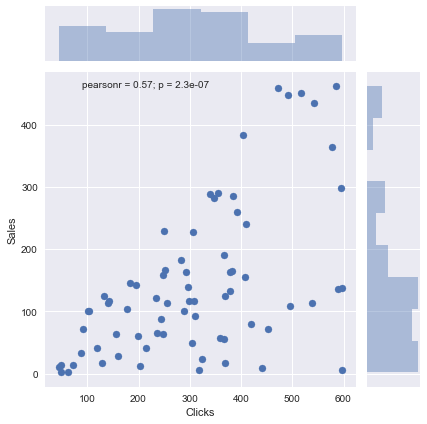

In [125]:
sns.jointplot(x="Clicks", y="Sales", data=campaigns_new);

When exploring a relationship we can take it further and also add a regression line to the plot.

In [25]:
np.random.seed(sum(map(ord, "regression")))

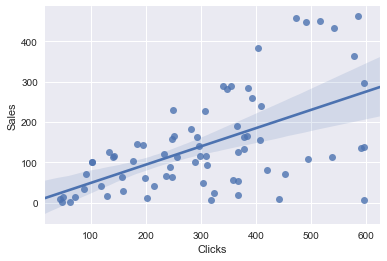

In [26]:
sns.regplot(x="Clicks", y="Sales", data=campaigns_new);

In the following example, I applied a condition. I visualized the bivariate distribution of sales and clicks, exploring the relationship between sales and clicks in each of the websites' groups.

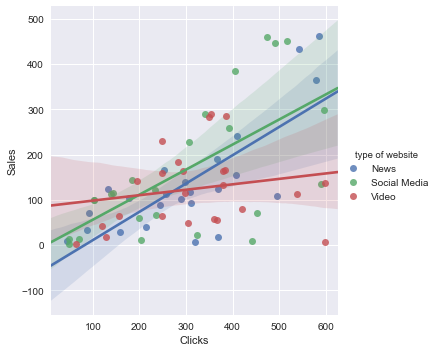

In [168]:
sns.lmplot(x="Clicks", y="Sales", hue="type of website", data=campaigns_new);

<hr>

So far we had some fun with our simulated data, but now we will see how visualizations look like when applied to social data. For the following examples, a dataset with scraped posts and comments from Gert Wilders' facebook page was used. The dataset is unfortunately not available anymore, but you can still read through the code. We will visualize the types of topics that were discussed in the comments to the page's posts during the six months before the recent elections in March 2017.

In [29]:
gertwilders_comments = pd.read_table("gertwilders_comments.tab")

Social data can be messy and overloaded. Hence, we should first clean and inspect the data. I categorized the data to few topics before starting to visualize the data.

In [31]:
gertwilders_comments['Sentiments_about_muslims'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['muslim','muslims','islam','arabs','arab','moslims','moslim'],))

In [32]:
gertwilders_comments['Immigration'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['immigration','immigratie','immigrants','immigranten','immigrant','inwijkeling'],))

In [33]:
gertwilders_comments['EU'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['EU', 'eu','eurapean union','europe','europeese Unie','europa','europe'],))

In [34]:
gertwilders_comments['PvdA'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['PvdA','Lodewijk Asscher','Partij van de Arbeid'],))

In [35]:
gertwilders_comments['VVD'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['VVD','Mark Rutte','Volkspartij voor Vrijheid en Democratie'],))

In [36]:
gertwilders_comments['Refuges'] = gertwilders_comments['comment_message'].apply(wordlist_any_present,
                                                       args=(['Refuges','toevluchtsoorden','toevluchtsoord','asylum','asiel','wijkplaats','toevlucht',
                                                             'schuilplaats','vluchtheuvel','hulpmiddel','aid'],))

In [37]:
def categorise_df(row):
    row['type_of_comment'] = "type of comment"
    if (row['Sentiments_about_muslims'] == 1) and (row['Immigration'] == 1) and (row['Refuges'] == 1) and (row['EU'] == 1) and (row['VVD'] == 1) and (row['PvdA'] == 1):
        row['type_of_comment'] = 'All'
    if (row['Sentiments_about_muslims'] == 1) and (row['Immigration'] == 0) and (row['Refuges'] == 0) and (row['EU'] == 0) and (row['VVD'] == 0) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'Islam'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 1) and (row['Refuges'] == 0) and (row['EU'] == 0) and (row['VVD'] == 0) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'Immigration'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 0) and (row['Refuges'] == 1) and (row['EU'] == 0) and (row['VVD'] == 0) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'Refuges'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 0) and (row['Refuges'] == 0) and (row['EU'] == 1) and (row['VVD'] == 0) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'EU'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 0) and (row['Refuges'] == 0) and (row['EU'] == 0) and (row['VVD'] == 1) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'VVD'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 0) and (row['Refuges'] == 0) and (row['EU'] == 0) and (row['VVD'] == 0) and (row['PvdA'] == 1):
        row['type_of_comment'] = 'PvDA'
    if (row['Sentiments_about_muslims'] == 0) and (row['Immigration'] == 0) and (row['Refuges'] == 0) and (row['EU'] == 0) and (row['VVD'] == 0) and (row['PvdA'] == 0):
        row['type_of_comment'] = 'Nothing'
    if (row['Sentiments_about_muslims'] + row['Immigration'] + row['Refuges'] + row['EU'] + row['VVD'] + row['PvdA'] >= 2):
        row['type_of_comment'] = 'Mixed'
    return row

In [38]:
gertwilders = gertwilders_comments.apply(categorise_df, axis=1)

For the first visualization, I will compare the number of comments per each of the groups.

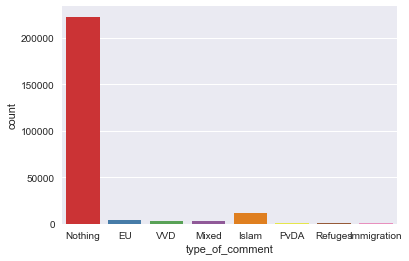

In [171]:
sns.countplot(x="type_of_comment", data= gertwilders, palette="Set1");

As you can probably see, most of the comments did not include any of the topics. When dealing with social data we sometimes collect loads of data that are not relevant to our topic. In this case, I will focus in the following visualizations only on the comments from these categories, so before I continue I create a new data frame, excluding the comments that have nothing to do with any of the categories.

In [41]:
gertwilders_new = gertwilders[gertwilders.type_of_comment != 'Nothing']

Again, I visualize the number of comments per each of the groups using bar charts, only that this time I exclude the category of "Nothing".

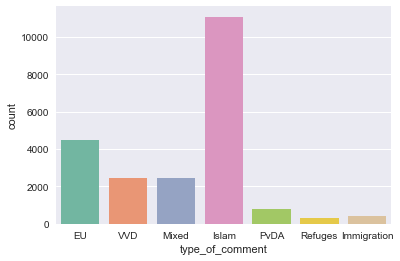

In [170]:
sns.countplot(x="type_of_comment", data= gertwilders_new, palette="Set2");

<hr>

As we could see in the previous bar chart, the most frequent category were comments about Islam. So in the following example, I would like to see when was this topic discussed on a timeline. First, I should fix the dates column so that it would fit the visualization. The relevent column would be "comment_published".

In [ ]:
gertwilders_new['comment_published'] = gertwilders_new['comment_published'].apply(pd.to_datetime)

Then, if I will use my current data frame I will not be able to get an accurate visualization of this category. What I would do is creating a new data frame according to my last one, taking into consideration only the comments from this specific category.

In [ ]:
gertwilders_islam = gertwilders_new[gertwilders.type_of_comment == "Islam"]

Now I will write the code for the visualizatient_publishedon. When setting the index I should refer it to the relevant column (In this case - 'comment_published'). Then, when grouping by "TimeGrouper" I will define the frequency, I chose to group it by weeks (Y), but you can also group by months (M), days (D), years (Y), hours (H), and even by a specific number of days/weeks/months (10D/183W/6M) and etc. Now I will define the units of analysis. Since our new data frame includes only comments from the relevant category the right column should be "type_of_comment". Finally, I finish the code with a function I would like to run. In this example, I used "count" for counting the comments over the timeline. You can also use other functions, for example, you can use the "mean" function for calculating the mean value at a particular point in time.

In [135]:
Islamgraph = gertwilders_islam.set_index('comment_published').groupby(pd.TimeGrouper(freq='W'))['type_of_comment'].count()

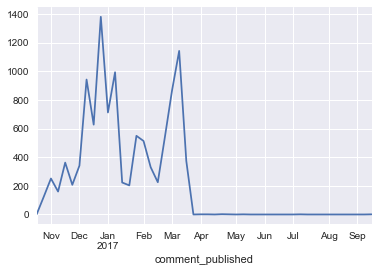

In [136]:
Islamgraph.plot()

Now I can go throw the same process creating a timeline for the category of comments regarding the European Union.

In [ ]:
gertwilders_eu = gertwilders_new[gertwilders.type_of_comment == "EU"]

In [176]:
eugraph = gertwilders_eu.set_index('comment_published').groupby(pd.TimeGrouper(freq='w'))['type_of_comment'].count()

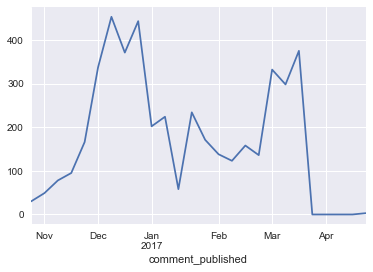

In [177]:
eugraph.plot()

If I would want to create a timeline for each of the categories and present them side by side, I could use the following command (with the data frame that includes all of the categories).

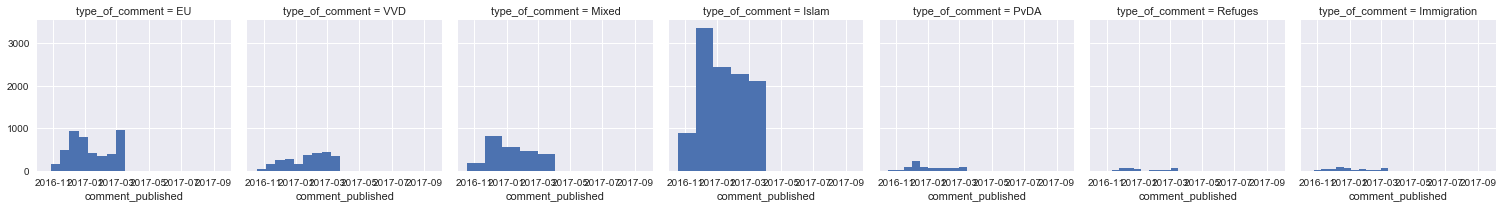

In [178]:
allgroups = sns.FacetGrid(gertwilders_new, col="type_of_comment")
allgroups.map(plt.hist, "comment_published");

<hr>

<font size = 3>There are many other types of visualizations and different ways and possibilities to design them in different ways. You are encouraged to explore it yourself and use different styles and colours for your visualizations. Different commands for more types of visualizing and for styling your visualizations are available at the <a href = "http://seaborn.pydata.org/index.html"> Seaborn library</a>.</font>

<hr>